In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/zebrafish_processed.h5ad")

In [3]:
adata.obs.columns

Index(['cell', 'Size_Factor', 'n.umi', 'perc_mitochondrial_umis', 'timepoint',
       'Oligo', 'hash_umis', 'top_to_second_best_ratio', 'cell_type_sub',
       'cell_type_broad', 'tissue', 'germ_layer', 'log.n.umi',
       'num_genes_expressed', 'umap3d_1', 'umap3d_2', 'umap3d_3', 'all_clust',
       'major_group', 'group_cluster', 'gene_target', 'mean_nn_time',
       'subumap3d_1', 'subumap3d_2', 'subumap3d_3', 'sample', 'hash_plate',
       'log.hash_umis', 'gene1+gene2', 'gene_target_1', 'gene_target_2',
       'condition', 'is_control', 'logtime'],
      dtype='object')

In [5]:
len(adata.obs["cell_type_broad"].value_counts())

102

In [6]:
len(adata.obs["cell_type_sub"].value_counts())

151

In [15]:
frequency_df

cell_type_broad             KA neuron  NA  adrenal gland  \
timepoint gene1+gene2                                      
18.0      cdx4+cdx1a                4   1              0   
          cdx4+negative             1   1              0   
          control+negative         52   0              0   
          egr2b+negative           27   3              0   
          epha4a+negative          13   1              0   
...                               ...  ..            ...   
72.0      tbxta+negative            0   0              0   
          tfap2a+foxd3             17   9              8   
          tfap2a+negative          30   9              4   
          wnt3a+wnt8                0   0              0   
          zc4h2+negative            0   0              0   

cell_type_broad             anterior migratory muscle  basal cell  \
timepoint gene1+gene2                                               
18.0      cdx4+cdx1a                              302           1   
          cdx4+negative                           213           1   
          control+negative                        704          17   
          egr2b+negative                          392          11   
          epha4a+negative                         174           5   
...                                               ...         ...   
72.0      tbxta+negative                            0           0   
          tfap2a+foxd3                            880        4808   
          tfap2a+negative                         444        3769   
          wnt3a+wnt8                                0           0   
          zc4h2+negative                            0           0   

cell_type_broad             cardiomyocyte  chondrocranium  \
timepoint gene1+gene2                                       
18.0      cdx4+cdx1a                   76               0   
          cdx4+negative                78               0   
          control+negative            266               3   
          egr2b+negative              139               0   
          epha4a+negative              51               0   
...                                   ...             ...   
72.0      tbxta+negative                0               0   
          tfap2a+foxd3                172             419   
          tfap2a+negative             191             447   
          wnt3a+wnt8                    0               0   
          zc4h2+negative                0               0   

cell_type_broad             connective tissue-meninges-dermal FB  \
timepoint gene1+gene2                                              
18.0      cdx4+cdx1a                                         185   
          cdx4+negative                                      201   
          control+negative                                  2729   
          egr2b+negative                                    1006   
          epha4a+negative                                    450   
...                                                          ...   
72.0      tbxta+negative                                       0   
          tfap2a+foxd3                                      1498   
          tfap2a+negative                                    872   
          wnt3a+wnt8                                           0   
          zc4h2+negative                                       0   

cell_type_broad             contains head vasculature?  \
timepoint gene1+gene2                                    
18.0      cdx4+cdx1a                               190   
          cdx4+negative                            171   
          control+negative                         511   
          egr2b+negative                           137   
          epha4a+negative                           68   
...                                                ...   
72.0      tbxta+negative                             0   
          tfap2a+foxd3                               0   
          tfap2a+negative                            0   
    

In [16]:
adata.obs["timepoint"].unique()

array([18., 72., 36., 48., 24.])

/tmp/ipykernel_1886061/2760272103.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby(['gene1+gene2', 'cell_type_broad']).size().unstack(fill_value=0)


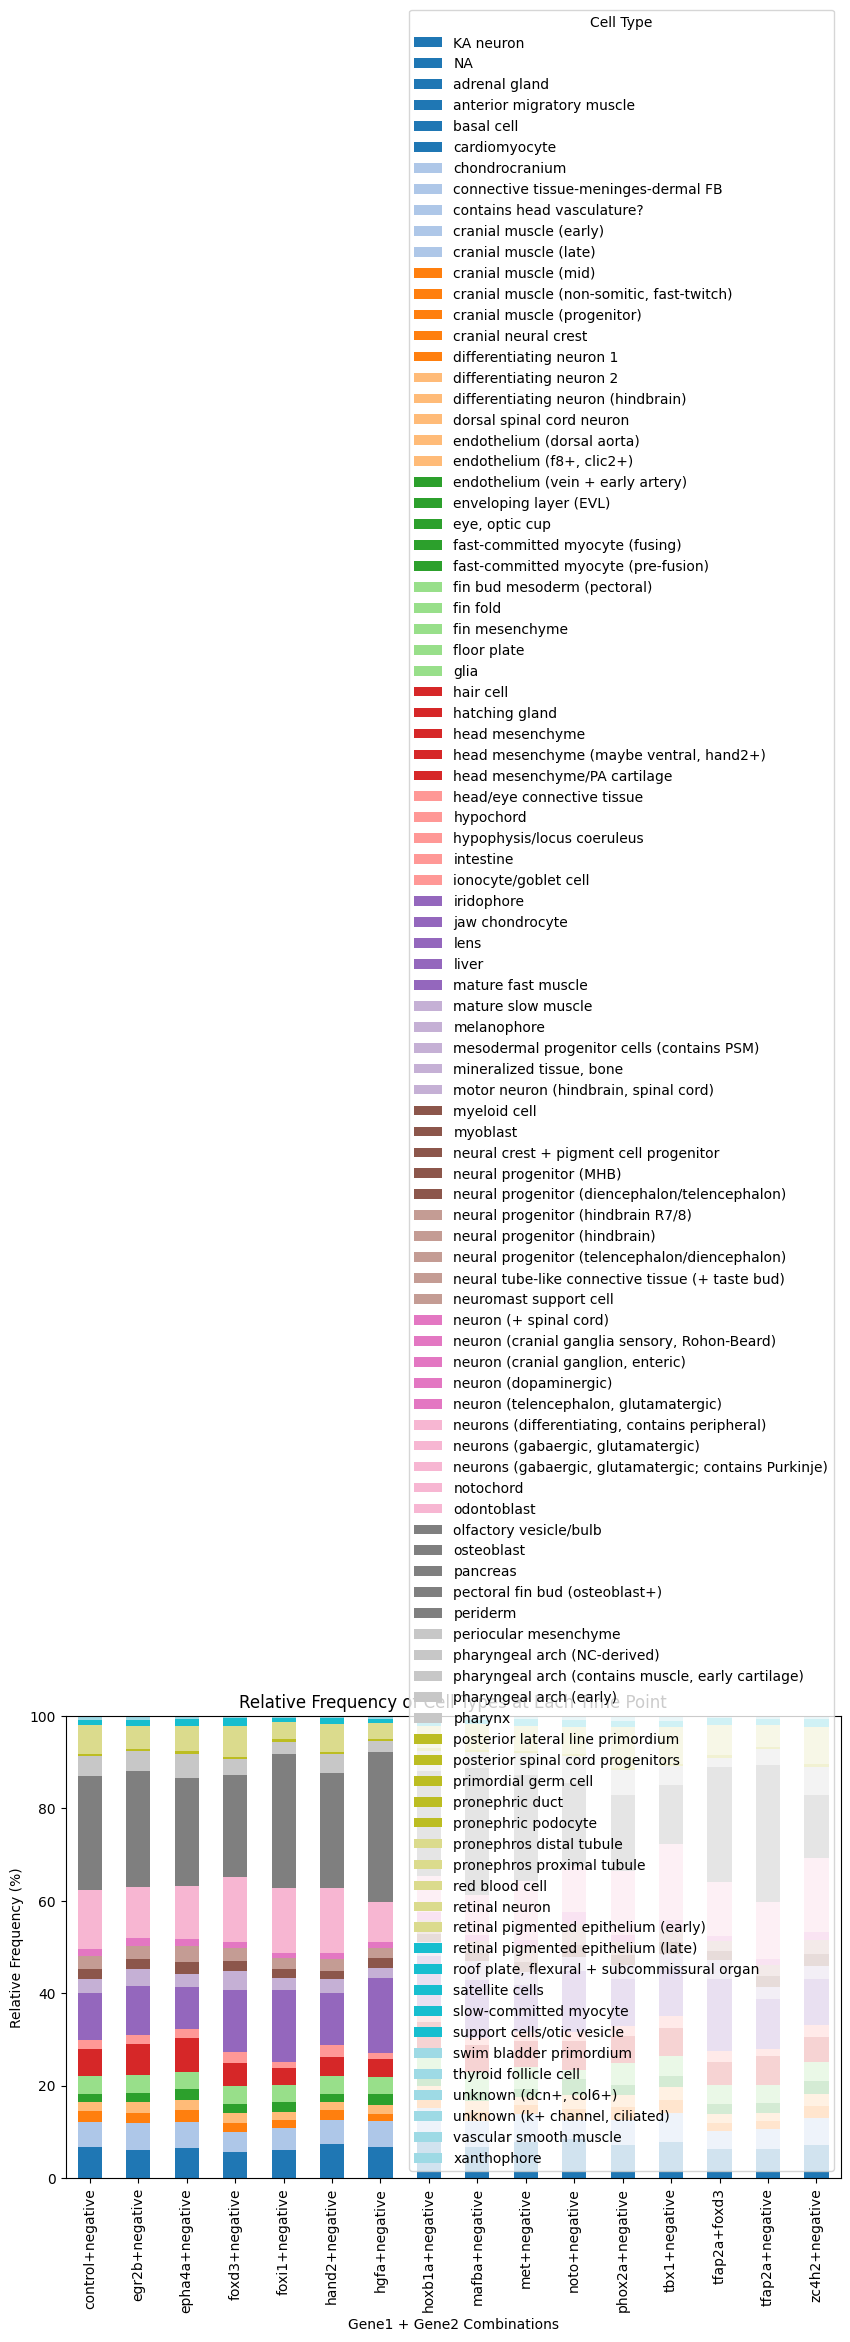

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df = adata.obs[adata.obs["timepoint"] == 48]

# Step 1: Group by 'gene1+gene2' and 'cell_type_broad', then count the size
frequency_df = df.groupby(['gene1+gene2', 'cell_type_broad']).size().unstack(fill_value=0)

# Step 2: Drop rows where all values are zero (no cell types in any 'gene1+gene2' combination)
frequency_df = frequency_df.loc[~(frequency_df == 0).all(axis=1)]

# Step 3: Calculate the relative frequency (as percentages)
relative_frequency_df = frequency_df.div(frequency_df.sum(axis=1), axis=0) * 100

# Step 4: Plot the stacked bar chart
relative_frequency_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Step 5: Customize the plot
plt.title('Relative Frequency of Cell Types at Each Time Point')
plt.xlabel('Gene1 + Gene2 Combinations')
plt.ylabel('Relative Frequency (%)')
plt.legend(title='Cell Type')
plt.ylim(0, 100)

# Show the plot
plt.show()


/tmp/ipykernel_1886061/4190976455.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby(['gene1+gene2', 'cell_type_broad']).size().unstack(fill_value=0)
/tmp/ipykernel_1886061/4190976455.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


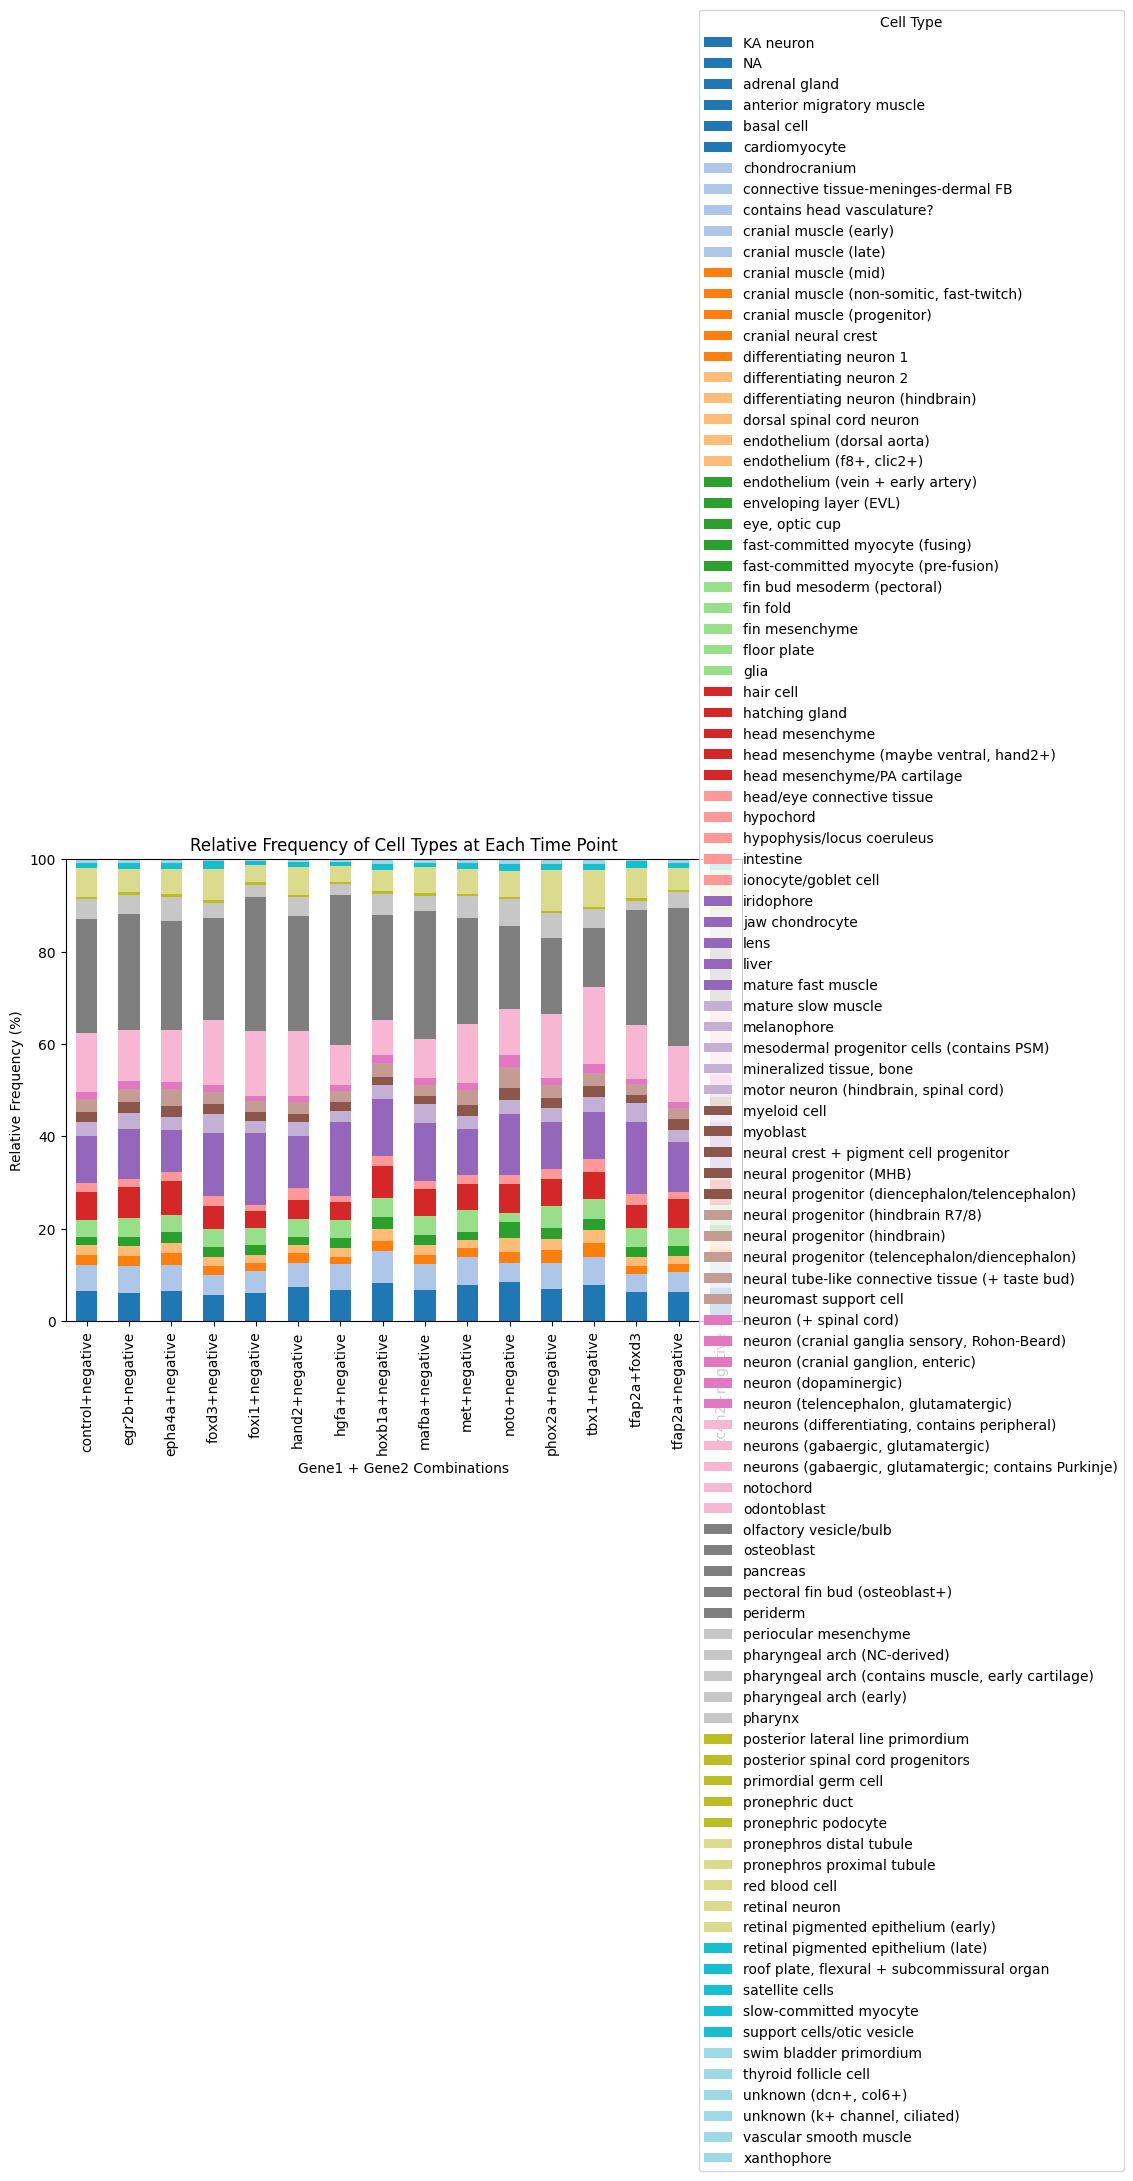

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df = adata.obs[adata.obs["timepoint"] == 48]

# Step 1: Group by 'gene1+gene2' and 'cell_type_broad', then count the size
frequency_df = df.groupby(['gene1+gene2', 'cell_type_broad']).size().unstack(fill_value=0)

# Step 2: Drop rows where all values are zero
frequency_df = frequency_df.loc[~(frequency_df == 0).all(axis=1)]

# Step 3: Calculate the relative frequency (as percentages)
relative_frequency_df = frequency_df.div(frequency_df.sum(axis=1), axis=0) * 100

# Step 4: Create a figure with two axes: one for the plot and one for the legend
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [4, 1]})

# Step 5: Plot the stacked bar chart on ax1
relative_frequency_df.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')

# Customize the plot
ax1.set_title('Relative Frequency of Cell Types at Each Time Point')
ax1.set_xlabel('Gene1 + Gene2 Combinations')
ax1.set_ylabel('Relative Frequency (%)')
ax1.set_ylim(0, 100)

# Remove the legend from the main plot
ax1.get_legend().remove()

# Step 6: Create a legend on ax2
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles, labels, title='Cell Type', loc='center')
ax2.axis('off')  # Turn off the axis for the legend

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
adata[(adata.obs["is_control"]) & (adata.obs["timepoint"]==18.0)]

View of AnnData object with n_obs × n_vars = 51202 × 2000
    obs: 'cell', 'Size_Factor', 'n.umi', 'perc_mitochondrial_umis', 'timepoint', 'Oligo', 'hash_umis', 'top_to_second_best_ratio', 'cell_type_sub', 'cell_type_broad', 'tissue', 'germ_layer', 'log.n.umi', 'num_genes_expressed', 'umap3d_1', 'umap3d_2', 'umap3d_3', 'all_clust', 'major_group', 'group_cluster', 'gene_target', 'mean_nn_time', 'subumap3d_1', 'subumap3d_2', 'subumap3d_3', 'sample', 'hash_plate', 'log.hash_umis', 'gene1+gene2', 'gene_target_1', 'gene_target_2', 'condition', 'is_control', 'logtime'
    var: 'gene_short_name', 'id', 'chromosome', 'bp1', 'bp2', 'gene_strand', 'num_cells_expressed', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'gene_embeddings', 'hvg', 'log1p'
    obsm: 'X_aligned', 'X_pca', 'X_umap'

# Leave out a time point completely

In [26]:
adata.obs["timepoint"].value_counts()

timepoint
36.0    838268
48.0    813185
72.0    464978
24.0    380101
18.0    262429
Name: count, dtype: int64

In [27]:
condition_counts = adata.obs.groupby('timepoint')['gene1+gene2'].nunique()
unique_conditions = adata.obs.groupby('timepoint')['gene1+gene2'].apply(pd.unique).reset_index()
unique_conditions['n_conditions'] = condition_counts.values
unique_conditions

,timepoint,gene1+gene2,n_conditions
0,18.0,"['control+negative', 'noto+negative', 'smo+neg...",13
1,24.0,"['control+negative', 'zc4h2+negative', 'tbx16+...",17
2,36.0,"['control+negative', 'met+negative', 'cdx4+cdx...",23
3,48.0,"['control+negative', 'hgfa+negative', 'epha4a+...",16
4,72.0,"['control+negative', 'tfap2a+negative', 'tfap2...",7


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

res_df = pd.DataFrame(index=adata.obs["cell_type_broad"].unique())

for tp in adata.obs["timepoint"].unique():
    df_t = adata.obs[adata.obs["timepoint"] == tp]
    
    for cond in df_t["condition"].unique():
    
        df = df_t[df_t["condition"]==cond]
        frequency_df = df['cell_type_broad'].value_counts()/len(df)
        res_df[cond] = frequency_df
        

Compute the cell type distribution for each time point

In [48]:
adata.obs.groupby()

,control_control_18,noto_control_18,smo_control_18,cdx4_control_18,mafba_control_18,tbx16_control_18,egr2b_control_18,wnt3a_wnt8_18,tbx16_tbx16l_18,cdx4_cdx1a_18,...,mafba_control_24,smo_control_24,wnt3a_wnt8_24,epha4a_control_24,cdx4_cdx1a_24,cdx4_control_24,tbx1_control_24,tbx16_control_24,tbxta_control_24,hoxb1a_control_24
head mesenchyme/PA cartilage,0.009140,0.006760,0.005094,0.009947,0.006691,0.008418,0.009426,0.008762,0.007247,0.007893,...,0.011410,0.007646,0.007387,0.011043,0.014174,0.016021,0.014520,0.012223,0.016694,0.008681
intestine,0.007656,0.006460,0.008799,0.010743,0.007165,0.003691,0.007719,0.009030,0.003623,0.009183,...,0.006907,0.009381,0.009709,0.007213,0.007946,0.010783,0.008322,0.004611,0.019572,0.006873
basal cell,0.000332,0.000466,0.000132,0.000080,0.000475,0.000135,0.000427,0.000179,0.000423,0.000076,...,0.002023,0.000922,0.000422,0.001851,0.000322,0.000924,0.001771,0.001174,0.000461,0.001375
neural progenitor (hindbrain R7/8),0.039217,0.053615,0.054313,0.029922,0.032201,0.037544,0.041272,0.027269,0.036415,0.028610,...,0.022438,0.042078,0.013930,0.040917,0.014174,0.018024,0.022178,0.033494,0.021529,0.022933
"neurons (differentiating, contains peripheral)",0.008867,0.006727,0.007343,0.006366,0.011266,0.007338,0.010318,0.007510,0.007670,0.005236,...,0.010990,0.009435,0.006332,0.014107,0.007194,0.008935,0.008367,0.012049,0.007138,0.009766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swim bladder primordium,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
adrenal gland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000,0.000000,0.000000,0.000000
enveloping layer (EVL),0.000547,0.000100,0.000000,0.000159,0.000000,0.000000,0.000039,0.000000,0.000060,0.000076,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000691,0.000000
"mineralized tissue, bone",0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
adata.obs["gene_target"] = adata.obs.apply(lambda x: x["gene_target_1"]+"_"+x["gene_target_2"], axis=1)

In [53]:
adata.obs["gene_target"].value_counts()

gene_target
control_control    610839
egr2b_control      190132
mafba_control      160577
tfap2a_control     159388
hgfa_control       149619
noto_control       145433
tfap2a_foxd3       127151
epha4a_control     124704
foxd3_control      116702
met_control         91882
tbx1_control        87472
foxi1_control       81688
zc4h2_control       73288
hand2_control       72216
hoxb1a_control      71298
phox2a_control      71102
tbx16_control       69279
tbx16_msgn1         60289
tbx16_tbx16l        58023
smo_control         57625
cdx4_control        57611
cdx4_cdx1a          48277
tbxta_control       39680
wnt3a_wnt8          34686
Name: count, dtype: int64

In [59]:
df_res = adata.obs.groupby("gene_target")["timepoint"].unique().to_frame()


In [60]:
df_res

,timepoint
gene_target,
cdx4_cdx1a,"[36.0, 24.0, 18.0]"
cdx4_control,"[18.0, 36.0, 24.0]"
control_control,"[18.0, 72.0, 36.0, 48.0, 24.0]"
egr2b_control,"[36.0, 24.0, 48.0, 18.0]"
epha4a_control,"[48.0, 24.0, 36.0, 18.0]"
foxd3_control,"[72.0, 36.0, 48.0]"
foxi1_control,"[72.0, 48.0]"
hand2_control,"[24.0, 48.0, 36.0]"
hgfa_control,"[48.0, 72.0, 36.0]"


We have no combination across all time points. But we can try to leave out 

# Perturbational analysis

In [94]:
gene_2_targets = set(adata[adata.obs["gene_target_2"] != "control"].obs["gene_target_2"].unique())
gene_2_targets

{'cdx1a', 'foxd3', 'msgn1', 'tbx16l', 'wnt8'}

In [99]:

gene_1_targets = adata[(adata.obs["gene_target_2"].isin(gene_2_targets))].obs["gene_target_1"].unique()

In [107]:
import itertools
for g1, g2 in itertools.product(gene_1_targets, gene_2_targets):
    if adata[(adata.obs["gene_target_1"]==g1) & (adata.obs["gene_target_2"]==g2)].n_obs > 0:
        print(f"{g1} and {g2} combined present")

tfap2a and foxd3 combined present
cdx4 and cdx1a combined present
tbx16 and tbx16l combined present
tbx16 and msgn1 combined present
wnt3a and wnt8 combined present


In [122]:
df_res1 = (adata.obs.groupby("gene_target")["gene_target_1"].value_counts().unstack(fill_value=0)>0).sum(axis=0)
df_res1

gene_target_1
cdx4       2
control    1
egr2b      1
epha4a     1
foxd3      1
foxi1      1
hand2      1
hgfa       1
hoxb1a     1
mafba      1
met        1
noto       1
phox2a     1
smo        1
tbx1       1
tbx16      3
tbxta      1
tfap2a     2
wnt3a      1
zc4h2      1
dtype: int64

In [123]:
# we should use some of the following gene knockouts 
df_res1[df_res1.values>1]

gene_target_1
cdx4      2
tbx16     3
tfap2a    2
dtype: int64

In [124]:
df_res2 = (adata.obs.groupby("gene_target")["gene_target_2"].value_counts().unstack(fill_value=0)>0).sum(axis=0)
df_res2

gene_target_2
cdx1a       1
control    19
foxd3       1
msgn1       1
tbx16l      1
wnt8        1
dtype: int64

In [126]:
df_res1+df_res2

cdx1a       NaN
cdx4        NaN
control    20.0
egr2b       NaN
epha4a      NaN
foxd3       2.0
foxi1       NaN
hand2       NaN
hgfa        NaN
hoxb1a      NaN
mafba       NaN
met         NaN
msgn1       NaN
noto        NaN
phox2a      NaN
smo         NaN
tbx1        NaN
tbx16       NaN
tbx16l      NaN
tbxta       NaN
tfap2a      NaN
wnt3a       NaN
wnt8        NaN
zc4h2       NaN
dtype: float64

foxd3, cdx4, tbx16, and tfap2a appear in more than one combination. So we can leave them out.

# Single-cell analysis

Choose one cell in early time point, and follow the trajectory for "continuous" t given different perturbations. I.e. train the model on all the data, and then visualize gene expression trends along the trajectory